In [1]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score


<ipython-input-1-0e92a4ef05b7>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Series, datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/satwick

/content/drive/.shortcut-targets-by-id/1Q7tCjUDVWNxqqDlXzHn9q9tz24RDFxBt/satwick


In [4]:
df = pd.read_csv('BTC-2021min.csv')

In [ ]:
df.head()

,open,high,low,close,Volume BTC
date,,,,,
2022-03-01 03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000
2022-03-01 03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977
2022-03-01 03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230
2022-03-01 03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950
2022-03-01 03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210


In [5]:
df = df[['date', 'open', 'high', 'low', 'close', 'Volume BTC']]
df = df.dropna()
newdf = df

In [ ]:
# df["date"] =  pd.to_datetime(df["date"])
# df

In [6]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['date'])
df
  
# drop The original date column
df = df.drop(['date'], axis='columns')
df

,open,high,low,close,Volume BTC
date,,,,,
2022-03-01 03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000
2022-03-01 03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977
2022-03-01 03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230
2022-03-01 03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950
2022-03-01 03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210
...,...,...,...,...,...
2021-01-01 00:05:00,29021.86,29023.38,28982.33,28999.50,1.062360
2021-01-01 00:04:00,29048.13,29057.73,29035.61,29045.19,1.446538
2021-01-01 00:03:00,29037.68,29069.39,29019.00,29048.13,2.189621


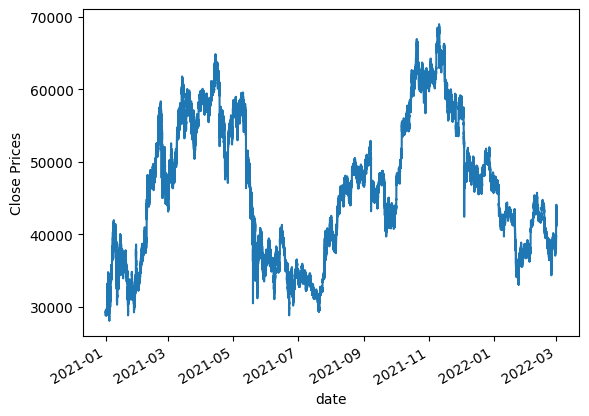

In [7]:
df['close'].plot()
plt.ylabel("Close Prices")
plt.show()

In [8]:
y = np.where(df['close'].shift(-1) > df['close'], 1, 0)
y

array([0, 0, 0, ..., 0, 1, 0])

In [9]:
X = df.drop(['close'], axis=1)
X

,open,high,low,Volume BTC
date,,,,
2022-03-01 03:43:00,43046.58,43046.58,43046.58,0.000000
2022-03-01 03:41:00,43018.23,43046.59,43018.23,0.142977
2022-03-01 03:40:00,43022.24,43022.24,43016.03,0.009230
2022-03-01 03:39:00,43035.16,43035.16,42999.44,0.820950
2022-03-01 03:38:00,43077.82,43077.82,43049.46,0.022210
...,...,...,...,...
2021-01-01 00:05:00,29021.86,29023.38,28982.33,1.062360
2021-01-01 00:04:00,29048.13,29057.73,29035.61,1.446538
2021-01-01 00:03:00,29037.68,29069.39,29019.00,2.189621


In [10]:
split = int(0.75*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [11]:
X_test


,open,high,low,Volume BTC
date,,,,
2021-04-17 00:56:00,61510.55,61556.86,61498.11,2.698104
2021-04-17 00:55:00,61542.52,61568.52,61510.55,0.090980
2021-04-17 00:54:00,61521.38,61557.64,61521.38,0.039245
2021-04-17 00:53:00,61496.41,61502.98,61495.14,0.139971
2021-04-17 00:52:00,61507.08,61525.81,61474.96,1.987208
...,...,...,...,...
2021-01-01 00:05:00,29021.86,29023.38,28982.33,1.062360
2021-01-01 00:04:00,29048.13,29057.73,29035.61,1.446538
2021-01-01 00:03:00,29037.68,29069.39,29019.00,2.189621


In [12]:
import pickle

In [13]:
scoring = 'accuracy'
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DT' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

filename = 'lr.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()



print(classification_report(y_test,y_pred))

Accuracy Score : 0.8091633048671871
Confusion Matrix :
Predicted      0      1
Actual                 
0          62688  14285
1          14855  60868
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     76973
           1       0.81      0.80      0.81     75723

    accuracy                           0.81    152696
   macro avg       0.81      0.81      0.81    152696
weighted avg       0.81      0.81      0.81    152696



In [15]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

filename = 'lda.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy Score : 0.8089995808665584
Confusion Matrix :
Predicted      0      1
Actual                 
0          63979  12994
1          16171  59552
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     76973
           1       0.82      0.79      0.80     75723

    accuracy                           0.81    152696
   macro avg       0.81      0.81      0.81    152696
weighted avg       0.81      0.81      0.81    152696



In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

filename = 'dt.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy Score : 0.6980994918007021
Confusion Matrix :
Predicted      0      1
Actual                 
0          53478  23495
1          22604  53119
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     76973
           1       0.69      0.70      0.70     75723

    accuracy                           0.70    152696
   macro avg       0.70      0.70      0.70    152696
weighted avg       0.70      0.70      0.70    152696



In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)

filename = 'nb.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
model = SVC()
model.fit(X_train, y_train)

filename = 'svm.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

filename = 'rf.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy Score : 0.7486640121548698
Confusion Matrix :
Predicted      0      1
Actual                 
0          57955  19018
1          19360  56363
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     76973
           1       0.75      0.74      0.75     75723

    accuracy                           0.75    152696
   macro avg       0.75      0.75      0.75    152696
weighted avg       0.75      0.75      0.75    152696



In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

filename = 'xgb.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


y_pred = loaded_model.predict(X_test)
accu_score = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Confusion Matrix :')
print (results)
plt.show()

print(classification_report(y_test,y_pred))

Accuracy Score : 0.587212500654896
Confusion Matrix :
Predicted      0      1
Actual                 
0          29182  47791
1          15240  60483
              precision    recall  f1-score   support

           0       0.66      0.38      0.48     76973
           1       0.56      0.80      0.66     75723

    accuracy                           0.59    152696
   macro avg       0.61      0.59      0.57    152696
weighted avg       0.61      0.59      0.57    152696



In [ ]:
test = X_test.iloc[150,:].values.reshape(1,-1)
test = np.array(test)
test

array([[6.17516200e+04, 6.17866000e+04, 6.17516200e+04, 2.26995171e+00]])

In [ ]:
filename = 'xgb.pkl'

loaded_model = pickle.load(open(filename, 'rb'))

a = loaded_model.predict(test)
print(a)


[1]


### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM (assuming X_train.shape = (n_samples, n_features))
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X.shape[1]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
3236/3236 [==============================] - 62s 8ms/step - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 2/5
3236/3236 [==============================] - 24s 8ms/step - loss: 0.6930 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 3/5
3236/3236 [==============================] - 24s 7ms/step - loss: 0.6930 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 4/5
3236/3236 [==============================] - 25s 8ms/step - loss: 0.6930 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 5/5
3236/3236 [==============================] - 25s 8ms/step - loss: 0.6930 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.5060


In [ ]:
test = X_train[10]
test = np.array(test)
test

array([[0.2799085 , 0.27821731, 0.28332376, 0.        ]])

In [ ]:
test = test.reshape((1, 1, 4))

In [ ]:
filename = 'lstm.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
filename = 'lstmnew.pkl'

loaded_model = pickle.load(open(filename, 'rb'))

a = loaded_model.predict(test)
print(a)


1/1 [==============================] - 1s 723ms/step
[[0.4892275]]


In [ ]:
a = loaded_model.predict(test)
print(a)

TypeError: ignored